# Objetivo: Entender o perfil dos clientes do estado de SP

In [365]:
# Importando pacotes necessários para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose 
import holidays
warnings.filterwarnings('ignore')
# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"

In [228]:
# Carregando as bases de dados
df_customers = pd.read_csv("data/olist_customers_dataset.csv")
df_orders = pd.read_csv("data/olist_orders_dataset.csv")
df_oitens = pd.read_csv("data/olist_order_items_dataset.csv")
df_prodts = pd.read_csv("data/olist_products_dataset.csv")
df_pays = pd.read_csv("data/olist_order_payments_dataset.csv")
df_geo = pd.read_csv("data/olist_geolocation_dataset.csv")

In [229]:
# Cruzando as informações e filtrando clientes do estado de SP
df_cons = df_customers[df_customers['customer_state'] == 'SP'].join(
    df_orders.set_index('customer_id'), on='customer_id', how='left').join(
    df_pays.set_index('order_id'), on='order_id', how='left').join(
    df_oitens.set_index('order_id'), on='order_id', how='left').join(
    df_prodts.set_index('product_id'), on='product_id', how='left')

In [230]:
# Visualizando as primeiras 5 linhas
df_cons.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [231]:
# Dimensao da base
df_cons.shape

(49967, 30)

In [232]:
# Tipo das variáveis
df_cons.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_descript

In [233]:
# Verificando o percentual de dados missings nas colunas
df_cons.isnull().sum() / df_cons.shape[0]

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001881
order_delivered_carrier_date     0.021194
order_delivered_customer_date    0.028959
order_estimated_delivery_date    0.000000
payment_sequential               0.000060
payment_type                     0.000060
payment_installments             0.000060
payment_value                    0.000060
order_item_id                    0.007965
product_id                       0.007965
seller_id                        0.007965
shipping_limit_date              0.007965
price                            0.007965
freight_value                    0.007965
product_category_name            0.022295
product_name_lenght              0

# Análise Exploratória

## Período de dados disponibilizados

In [234]:
# Formatando para colunas para datetime
df_cons['order_purchase_timestamp'] = pd.to_datetime(df_cons['order_purchase_timestamp'])
df_cons['order_approved_at'] = pd.to_datetime(df_cons['order_approved_at'])
df_cons['order_delivered_carrier_date'] = pd.to_datetime(df_cons['order_delivered_carrier_date'])
df_cons['order_delivered_customer_date'] = pd.to_datetime(df_cons['order_delivered_customer_date'])
df_cons['order_estimated_delivery_date'] = pd.to_datetime(df_cons['order_estimated_delivery_date'])

In [235]:
# O os dados estão dentro  
print('Dados de {} a {}.'.format(df_cons['order_purchase_timestamp'].dt.strftime('%Y-%m-%d').min(), 
                                df_cons['order_purchase_timestamp'].dt.strftime('%Y-%m-%d').max()))

Dados de 2016-09-13 a 2018-10-17.


Irei utilizar nas análises destes dados o período fechado de 1 ano (2017).

## Volume de ordens de vendas emitidas no ano de 2017

In [290]:
# Filtrando o ano de 2017
df_vol_hist = df_cons[(df_cons['order_purchase_timestamp'] >= '2017-01-1') & 
                      (df_cons['order_purchase_timestamp'] <= '2017-12-31') ]
# Alterando o formato da data para melhor manipulação
df_vol_hist['ano_mes'] = df_vol_hist['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
# Contando a quantidade de ordens emitidas por dia
ts_ordens = df_vol_hist.groupby('ano_mes')['customer_id'].count().reset_index()
ts_ordens.set_index('ano_mes', inplace = True)
ts_ordens.index = pd.to_datetime(ts_ordens.index)

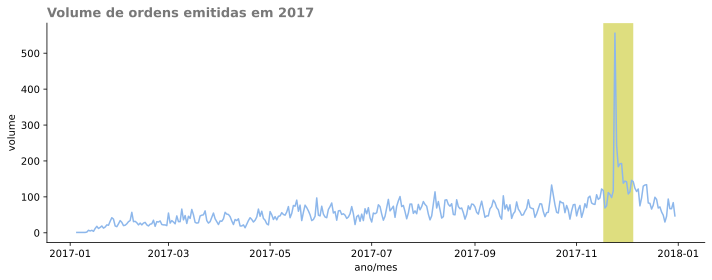

In [342]:
# Plotando a timeseries
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Volume de ordens emitidas em 2017',loc='left', size=13, weight='bold', color=CINZA3)
g1 = plt.plot(ts_ordens.index, ts_ordens.customer_id, color=AZUL1)
plt.axvspan('2017-11-17T00:00:00.000000000','2017-12-05T00:00:00.000000000', color='y', alpha=0.5, lw=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('ano/mes')
plt.ylabel('volume')
plt.tight_layout()
plt.show()

Durante o ano de 2017, há uma variação no volume de ordens emitidas, com uma certa tendência de aumento. <br>
<b>O que chama a atenção é um pico de ordens emitidas entre os meses de novembro e dezembro de 2017. </b><br>
Pesquisando eventos que aconteceram neste período, encontrei o evento da blackfriday, onde há promoções significativas nas lojas de varejo ou atacado.
<img src="img/noticia_blackfriday.png" width=70%>

In [343]:
# Quantidade de ordens de vendas emitidas nesta black friday.
print('Em 24 de outubro de 2017 foram emitidas {} ordens de vendas.'.format(
    ts_ordens[ts_ordens['customer_id'] == ts_ordens['customer_id'].max()]['customer_id'].values[0]))

Em 24 de outubro de 2017 foram emitidas 556 ordens de vendas.


## Volume de vendas efetivadas na Black Friday

In [121]:
# Contando o volume de vendas efetivadas
volume_entrega = df_vol_hist[(df_vol_hist['ano_mes'] == '2017-11-24') & (df_vol_hist['order_status'] == 'delivered')].shape[0]
print('''Foram efetivas {} vendas.
{}% das vendas (efetivadas e não efetivadas) foram efetivadas.'''.format(volume_entrega, round(volume_entrega/556, 2) * 100))

Foram efetivas 537 vendas.
97.0% das vendas (efetivadas e não efetivadas) foram efetivadas.


## Categorias de produtos mais vendidas na Black Friday
Não tem o nome do produto nas bases de dados, sendo possível indicar somente a categoria do produto.

In [391]:
# Contando as categorias de produtos mais vendidas
df_blackf = df_vol_hist[(df_vol_hist['ano_mes'] == '2017-11-24')]
df_categ = df_blackf.groupby('product_category_name').agg(
    {'customer_id': 'count', 'payment_value': 'mean'}).reset_index().sort_values(
    by='customer_id', ascending=False).rename(columns={'customer_id': 'qtd_compras', 'payment_value': 'mean_payment_value'})
df_categ['%local'] = (df_categ['qtd_compras'] / df_categ['qtd_compras'].sum()) * 100
df_categ['%acumulada'] = df_categ['%local'].cumsum()
rep_66 = df_categ.iloc[0: 16]
rep_resto=df_categ.iloc[16:]
resto = {'product_category_name': ['outros'], 'qtd_compras': [rep_resto['qtd_compras'].mean()],
         'mean_payment_value':[rep_resto['mean_payment_value'].mean()],'%local':[rep_resto['%local'].sum()],
         '%acumulada' :[rep_resto['%local'].sum() + 89.945155]}
rep_66 = rep_66.append(pd.DataFrame.from_dict(resto))
rep_66.loc[30, '%acumulada'] = 94

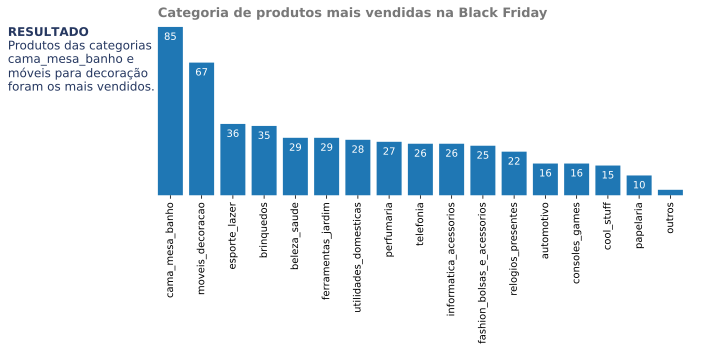

In [394]:
# Criando plotagem do gráfico
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(rep_66.product_category_name, rep_66['qtd_compras'], label="Volume de Vendas")
rects = ax.patches
# Função para plotar o rótulos
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if rect.get_x() == 15.6:
            pass
        else:
            ax.annotate(
                        '{}'.format(int(height)),
                        xy=(rect.get_x() + rect.get_width()/2,  height),
                        xytext=(0, -15),  # offset
                        textcoords="offset points",
                        ha='center',
                        va='bottom',
                        fontsize=10,
                        color="white",
                        )
# plotar labels dentro das barras
autolabel(rects)
# remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
# Rotacionar as labels do eixo x em 90º
ax.xaxis.set_tick_params(rotation=90)
plt.text(-.4, 90, 'Categoria de produtos mais vendidas na Black Friday', color = CINZA3, weight='bold', size=13)
# Plotando conlusão
plt.text(-5.2, 85,
         "$\\bf{RESULTADO}$\n"
         "Produtos das categorias\n"
         "cama_mesa_banho e\n"
         "móveis para decoração\n"
         "foram os mais vendidos."
         ,
         verticalalignment="top",
         fontsize=12,
         color=AZUL2)
plt.tight_layout()
plt.show()

## Categorias de produtos mais vendidos em 2017

In [399]:
# Contando a quantidade de categorias de produtos mais vendidos em 2017
df_vol_hist['ano_mes'] = pd.to_datetime(df_vol_hist.ano_mes)
df_tipo_all = df_vol_hist.copy()
df_categ = df_tipo_all.groupby('product_category_name').agg(
    {'customer_id': 'count', 'payment_value': 'mean'}).reset_index().sort_values(
    by='customer_id', ascending=False).rename(columns={'customer_id': 'qtd_compras', 'payment_value': 'mean_payment_value'})
df_categ['%local'] = (df_categ['qtd_compras'] / df_categ['qtd_compras'].sum()) * 100
df_categ['%acumulada'] = df_categ['%local'].cumsum()
rep_66 = df_categ.iloc[0:10]

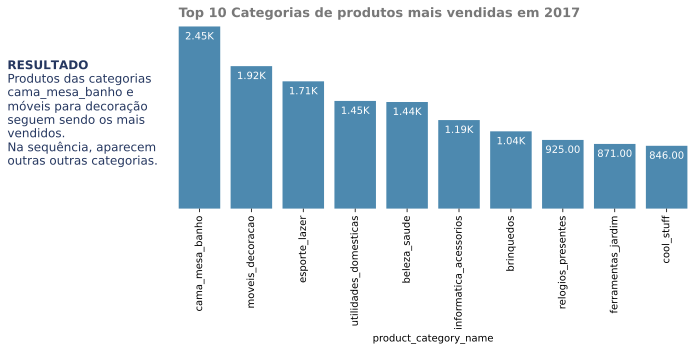

In [401]:
# Tratando números maiores que mil
millnames = ['','K']
def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))
    return '{:.2f}{}'.format(n / 10**(3 * millidx), millnames[millidx])
# Criando o plot do gráfico
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='product_category_name', y='qtd_compras', data= rep_66,ax=ax, color="#3D8DBF")
rects = ax.patches
# Função para plotar o rótulos
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if rect.get_x() == 15.6:
            pass
        else:
            ax.annotate(
                        '{}'.format(millify(int(height))),
                        xy=(rect.get_x() + rect.get_width()/2,  height),
                        xytext=(0, -15),  # offset
                        textcoords="offset points",
                        ha='center',
                        va='bottom',
                        fontsize=10,
                        color="white"
                        )
# plotar labels dentro das barras
autolabel(rects)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
# Título
plt.text(-.4, 2580, 'Top 10 Categorias de produtos mais vendidas em 2017', color = CINZA3, weight='bold', size=13)
# plotar anotações do resultado da campanha
plt.text(-3.7, 2000,
         "$\\bf{RESULTADO}$\n"
         "Produtos das categorias\n"
         "cama_mesa_banho e\n"
         "móveis para decoração\n"
         "seguem sendo os mais \n"
         "vendidos. \n"
         "Na sequência, aparecem \n"
         "outras outras categorias."
         ,
         verticalalignment="top",
         fontsize=12,
         color=AZUL2)
# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
ax.xaxis.set_tick_params(rotation=90)
plt.tight_layout()
plt.show()

## Tickets

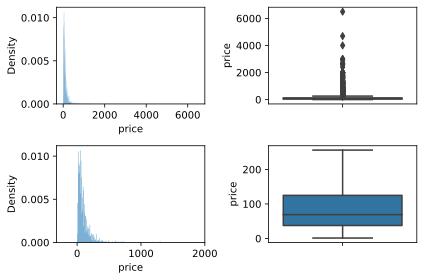

In [412]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
sns.histplot(df_vol_hist.price, stat='density', ax=ax1)
sns.boxplot(y=df_vol_hist.price,ax=ax2)
sns.histplot(df_vol_hist.price, stat='density', ax=ax3)
sns.boxplot(y=df_vol_hist.price, showfliers=False,ax=ax4)
ax3.set_xlim(right=2000)
plt.tight_layout()
plt.show()

# Ticket por categoria de produto

In [ ]:
category_value = df_vol_hist[['product_category_name', 'price']]

In [ ]:
join_rep = category_value.join(rep_66.set_index('product_category_name'), on='product_category_name', how='inner')

In [ ]:
category_labels = join_rep['product_category_name'].unique()
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5, figsize=(15, 10)) 
row1 = [ax1, ax2, ax3, ax4, ax5]
row2 = [ax6, ax7, ax8, ax9, ax10]
for axis_y in range(2):
    for axis_x in range(5):
        if axis_y == 0:
            category_df = join_rep[join_rep['product_category_name'] == category_labels[axis_x]]
            sns.boxplot(x = 'product_category_name', y = 'price', data = category_df, ax=row1[axis_x])
        else:
            category_df = join_rep[join_rep['product_category_name'] == category_labels[axis_x]]
            sns.boxplot(x = 'product_category_name', y = 'price', data = category_df, ax=row2[axis_x])
plt.tight_layout()
plt.show()

In [ ]:
rep_66[['product_category_name', 'mean_payment_value']].reset_index().drop('index', axis=1)

In [ ]:
print("""Dado que o desvio padrão da média do preço das categorias de produtos mais vendidos é {}, então
o preço médio de categorias de produtos mais vendidos estão próximos (não há valores discrepantes).""".format(
    round(rep_66.mean_payment_value.std(), 2)))

## Volume de clientes recorrentes

In [ ]:
# Agrupando por clientes e contando quantas ordens de compra ele emitiu.

df_oders_sp = customers_sp.loc[:, ['customer_id']].join(df_orders.set_index('customer_id'), on='customer_id', how='left')
clies_recorrentes = df_vol_hist.groupby('customer_id')['order_id'].count().reset_index().sort_values(
    'order_id', ascending=False).rename(columns={'order_id':'qtd_recorrencia'})

In [ ]:
clies_recorrentes.head()

In [ ]:
clies_recorrentes.qtd_recorrencia.unique()

<b>Normalmente, um cliente pode emitir mais de uma ordem compra, nesta base cada cliente só tem uma ordem de compra. </b>

## Q8. Em média, quanto tempo o tempo de atraso da entrega do produto?

In [ ]:
df_cons['order_delivered_carrier_date']
df_cons['order_delivered_customer_date']

In [ ]:
(df_cons['order_delivered_customer_date'] - df_cons['order_delivered_carrier_date']).mean()

In [ ]:
(df_cons['order_estimated_delivery_date'] - df_cons['order_delivered_carrier_date']).mean()